Import Libraries

In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('heartDisease.csv')

In [6]:
df.replace("?", np.nan, inplace=True)

In [7]:
df_cleaned = df.dropna()


In [8]:
print(df_cleaned)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0   

In [9]:
df_cleaned.to_csv('heartDisease_cleaned.csv', index=False)

Graph Distribution

In [10]:
import matplotlib.pyplot as plt


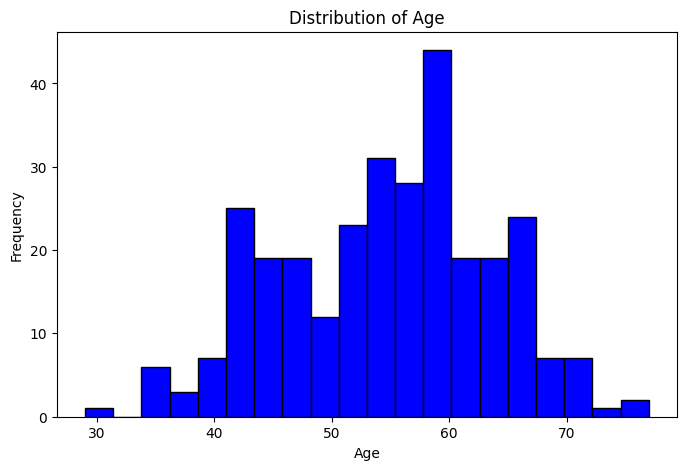

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


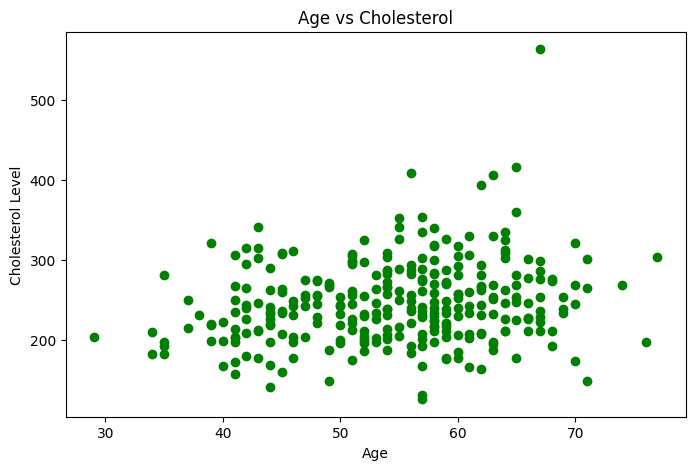

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned['age'], df_cleaned['chol'], color='green')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

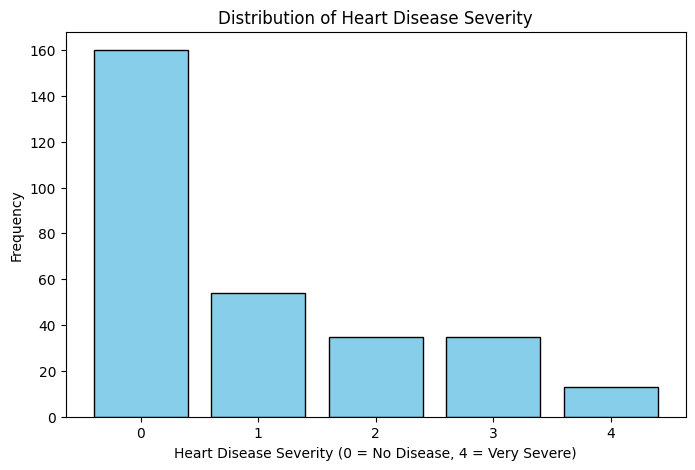

In [13]:
severity_counts = df_cleaned['num'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(severity_counts.index, severity_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Heart Disease Severity')
plt.xlabel('Heart Disease Severity (0 = No Disease, 4 = Very Severe)')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3, 4])  # Ensure that all severity levels (0-4) are shown on the x-axis
plt.show()


Train Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [15]:
X = df_cleaned.drop(columns=['num'])
Y = df_cleaned['num']


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [90]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000,)


In [92]:
model.fit(X_train, Y_train)

c:\Users\Sandesh Chipkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sandesh Chipkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [93]:
y_predict = model.predict(X_test)

In [94]:

print("\nClassification Report:\n", classification_report(Y_test, y_predict))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        36
           1       0.20      0.11      0.14         9
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.26      0.25      0.25        60
weighted avg       0.52      0.60      0.55        60



In [95]:
import pickle as pkl

In [96]:
with open('Prediction_model.pickle', 'wb') as file:
    pkl.dump(model, file)